# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### This first step will define some useful functions used for EDA and inferencial statistics

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x_val = np.sort(data)

    # y-data for the ECDF: y
    y_val = np.arange(1, n+1) / n

    return x_val, y_val

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size=len(data)))

    return bs_replicates

# Question 1

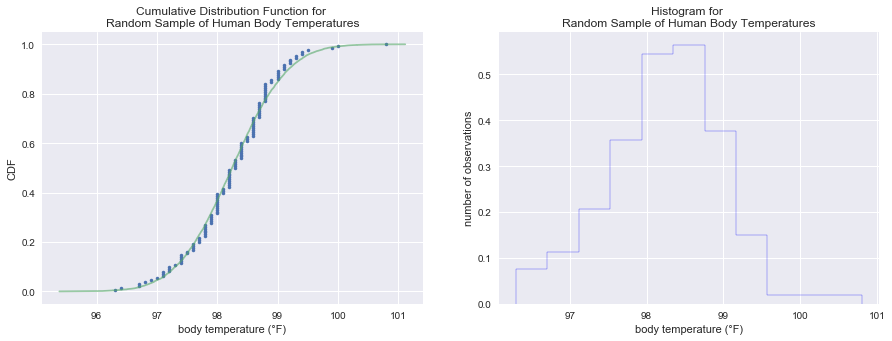

In [23]:
sns.set()
np.random.seed(42)

temp = df.temperature

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp)
sigma = np.std(temp)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)

# Get the CDF of the temperature data
x, y = ecdf(temp)

# Plot the temp CDF against the theoretical sampled CDF
plt.figure(figsize=(15,5))
plt.subplot(121)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, alpha=0.6)
_ = plt.xlabel('body temperature (°F)')
_ = plt.ylabel('CDF')
_ = plt.title('Cumulative Distribution Function for \nRandom Sample of Human Body Temperatures')

# Plot the histogram for the temp data
plt.subplot(122)
_ = plt.hist(temp, bins=(int(np.sqrt(len(temp)))), density=True, histtype='step', color='blue')
_ = plt.xlabel('body temperature (°F)')
_ = plt.ylabel('number of observations')
_ = plt.title('Histogram for \nRandom Sample of Human Body Temperatures')

plt.show()

# Question 2
- 130 random observations is a sufficiently large sample size (`n`)
    - In general, biologial processes (body temperature included) are normally distributed across the population. Therefore, parent population is normal
    - `n`  >= 30
    - sample is resonably symmetric with no extreme outliers
- With >7 Billion people to sample from, 130 is substantially lower than the 10% required to assume independence without replacement.
- We are told that the sample is randomly sampled but we are not told that the oberservations were taken with replacement.

# Question 3

observed mean body temperature 98.24923076923078
observed standard variation 0.7303577789050377
99% confidence interval = [98.07923077 98.41384615] °F


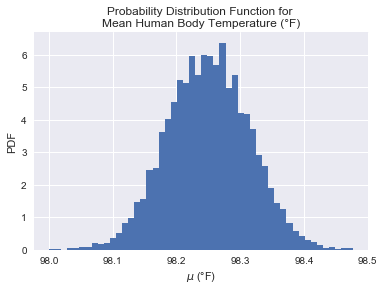

In [48]:
mean_temp = np.mean(temp)
std_temp = np.std(temp)
print('observed mean body temperature', mean_temp)
print('observed standard variation', std_temp)

np.random.seed(42)
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(temp, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [0.5, 99.5])

# Print the confidence interval
print('99% confidence interval =', conf_int, '°F')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\mu$ (°F)')
_ = plt.ylabel('PDF')
_ = plt.title('Probability Distribution Function for \nMean Human Body Temperature (°F)')

# Show the plot
plt.show()

 - Here we are testing our sample statistic (the mean body temperature of our sample) against the true population statistic. This is a one sample test.
     - When we look at mean body tempuratures of men vs. women, then we will be looking at a two-sample test.
     - In this example it is appropriate to use a z statistic. Traditionally we would use a t statistic for hypothesis tests with means but our sample size is > 30 and therefore we can approximate the z statistic with relative accuracy.
     - The result is almost the same because looking up a statistic as large as ±5.24 is off most conventional tables.
![Frequentist](Question 3.pdf)

In [45]:
temp_small_sample = np.array(temp[0:100:10])
temp_small_sample

array([99.3, 98.8, 98.3, 98.3, 98.4, 98.9, 99.1, 98.1, 98.8, 97.8])

In [47]:
small_mean = np.mean(temp_small_sample)
small_std = np.std(temp_small_sample)
print('observed mean body temperature', small_mean)
print('observed standard variation', small_std)

observed mean body temperature 98.58
observed standard variation 0.4489988864128732


- I know from experience that a t test is more appropriate for sample sizes smaller than 30 where the hypothesis is testing a given mean value against the mean of a sample.
!['FrequentistQ4'](Question 4.pdf)

# Question 5

- Based on the 99% confidence interval we calculated in Question 3, we can see that we are confident that the true mean for human body temperature is between 98.1 and 98.4°F. We could state that a body temperature greater than 98.4 is above the standard mean temperature for a human.

In [49]:
# Print the confidence interval
print('99% confidence interval =', conf_int, '°F')

99% confidence interval = [98.07923077 98.41384615] °F


t* for a 99% confidence interval and 100 df = 2.626

x ± t* (s/√n)

x ± 2.626(0.73/√130)

**98.25 ± 0.168**

# Question 6
- In this example we will use a two-sample test because we are comparing the mean body temperature of males vs. females.

In [50]:
male = df.temperature[df.gender == 'M']
female = df.temperature[df.gender == 'F']

In [53]:
male_mean = np.mean(male)
female_mean = np.mean(female)
print(male_mean, female_mean)

98.1046153846154 98.39384615384613


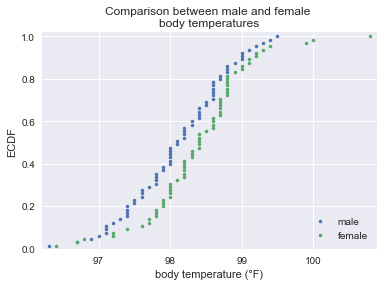

In [55]:
# Compute ECDFs
x_male, y_male = ecdf(male)
x_female, y_female = ecdf(female)

# Plot the ECDFs
_ = plt.plot(x_male, y_male, marker='.', linestyle='none')
_ = plt.plot(x_female, y_female, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('body temperature (°F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('male', 'female'), loc='lower right')
_ = plt.title('Comparison between male and female \nbody temperatures')

# Show the plot
plt.show()

In [60]:
np.random.seed(42)

# Compute the difference of the sample means: mean_diff
mean_diff = female_mean - male_mean

# Get bootstrap replicates of means
bs_replicates_male = draw_bs_reps(male, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_female - bs_replicates_male

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, '°F')
print('95% confidence interval =', conf_int, '°F')

difference of means = 0.289230769230727 °F
95% confidence interval = [0.04153846 0.53846154] °F


In [59]:
np.random.seed(42)

# Compute mean of combined data set: combined_mean
combined_mean = mean_temp

# Shift the samples
male_shifted = male - male_mean + combined_mean
female_shifted = female - female_mean + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_male = draw_bs_reps(male_shifted, np.mean, 10000)
bs_replicates_female = draw_bs_reps(female_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_female - bs_replicates_male

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0108


In this investigation we can say with 99% confidence that the mean body temperature for humans is between 98.1 and 98.4°F. We also found with a significance level of 5% that the mean temperature of men and women are not the same. We are 95% confident that the true mean difference in body temperature for men and women is between 0.04 and 0.54°F.